In [8]:
import gdsfactory as gf
import matplotlib.pyplot as plt
import numpy as np
import tidy3d as td

import gplugins as gp
import gplugins.tidy3d as gt
from gplugins import plot
from gplugins.common.config import PATH

In [9]:
gt.material_name_to_medium

{'si': Medium(attrs={}, name='Si', frequency_range=None, allow_gain=False, nonlinear_spec=None, modulation_spec=None, heat_spec=None, type='Medium', permittivity=12.0409, conductivity=0.0),
 'sio2': Medium(attrs={}, name='SiO2', frequency_range=None, allow_gain=False, nonlinear_spec=None, modulation_spec=None, heat_spec=None, type='Medium', permittivity=2.1609, conductivity=0.0),
 'sin': Medium(attrs={}, name='SiN', frequency_range=None, allow_gain=False, nonlinear_spec=None, modulation_spec=None, heat_spec=None, type='Medium', permittivity=4.0, conductivity=0.0)}

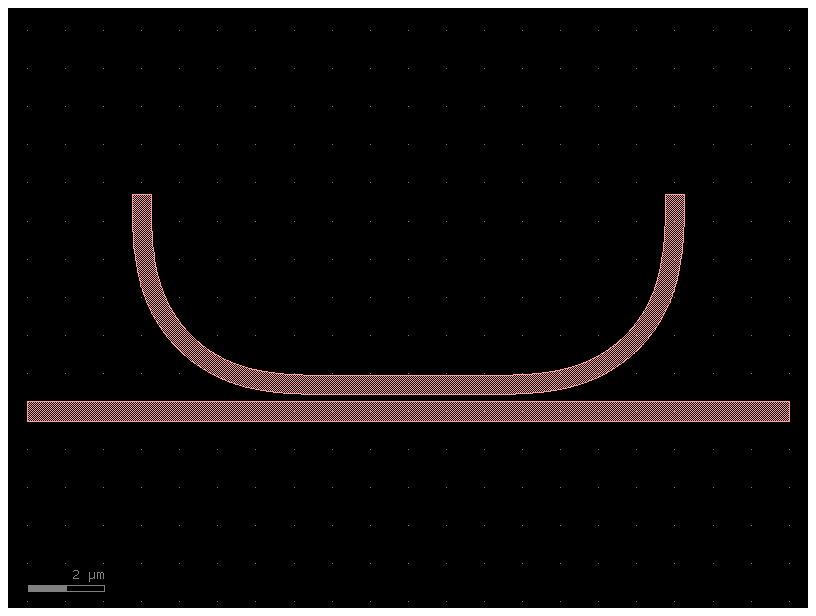

In [10]:
from gdsfactory.generic_tech import LAYER_STACK, get_generic_pdk

pdk = get_generic_pdk()
pdk.activate()

component = gf.components.coupler_ring()
component.plot()


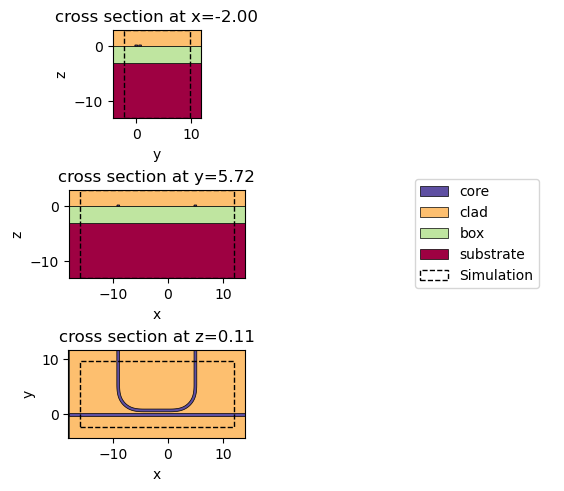

In [11]:
# define a mapping of pdk material names to tidy3d medium objects
mapping = {
    "si": td.Medium(name="Si", permittivity=3.47**2),
    "sio2": td.Medium(name="SiO2", permittivity=1.47**2),
}

# setup the tidy3d component
c = gt.Tidy3DComponent(
    component=component,
    layer_stack=LAYER_STACK,
    material_mapping=mapping,
    pad_xy_inner=2.0,
    pad_xy_outer=2.0,
    pad_z_inner=0,
    pad_z_outer=0,
    extend_ports=2.0,
)

# plot the component and the layerstack
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(ncols=2, nrows=3, width_ratios=(3, 1))
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
axl = fig.add_subplot(gs[1, 1])
c.plot_slice(x="core", ax=ax0)
c.plot_slice(y="core", ax=ax1)
c.plot_slice(z="core", ax=ax2)
axl.legend(*ax0.get_legend_handles_labels(), loc="center")
axl.axis("off")
plt.show()

03:43:34 CEST WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

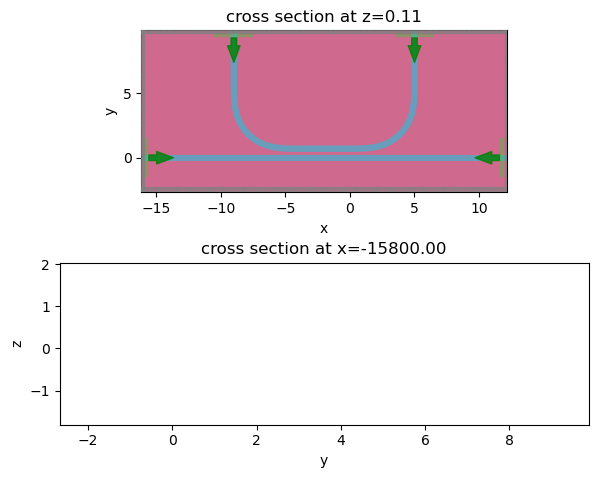

In [12]:
# initialize the tidy3d ComponentModeler
modeler = c.get_component_modeler(
    center_z="core", port_size_mult=(6, 4), sim_size_z=3.0
)

# we can plot the tidy3d simulation setup
fig, ax = plt.subplots(2, 1)
modeler.plot_sim(z=c.get_layer_center("core")[2], ax=ax[0])
modeler.plot_sim(x=c.ports[0].center[0], ax=ax[1])
fig.tight_layout()
plt.show()

In [13]:
sp = gt.write_sparameters(
    component,
    filepath=PATH.sparameters_repo / "coupler_ring_2d.npz",
    sim_size_z=0,
    center_z="core",
)

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

03:43:35 CEST WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

Output()

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              Started working on Batch containing 4 tasks.

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

03:43:36 CEST WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[2]' is outside of the simulation  
              domain.                                                           

ValueError: API key not found. To get your API key, sign into 'https://tidy3d.simulation.cloud' and copy it from your 'Account' page. Then you can configure tidy3d through command line 'tidy3d configure' and enter your API key when prompted. Alternatively, especially if using windows, you can manually create the configuration file by creating a file at their home directory '~/.tidy3d/config' (unix) or '.tidy3d/config' (windows) containing the following line: apikey = 'XXX'. Here XXX is your API key copied from your account page within quotes.

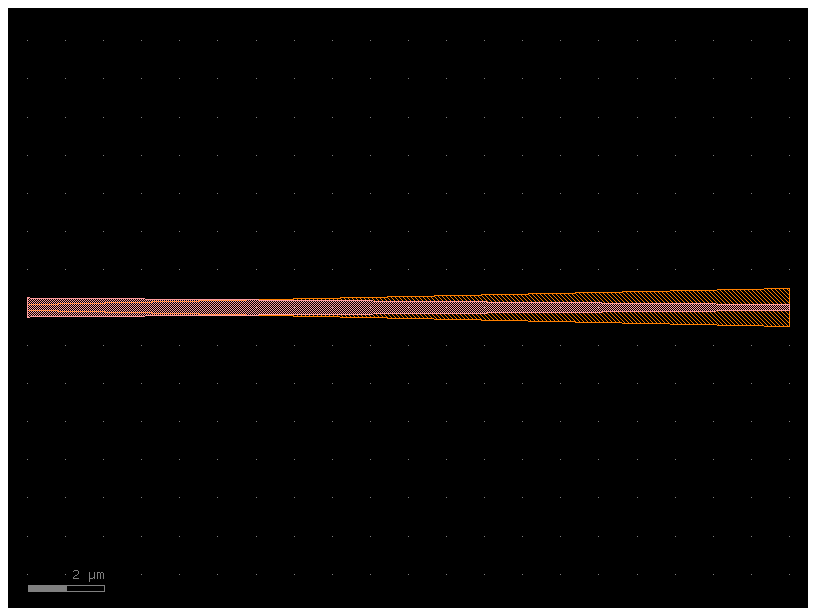

In [ ]:
c = gf.components.taper_sc_nc()
c.plot()

03:20:21 CEST WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

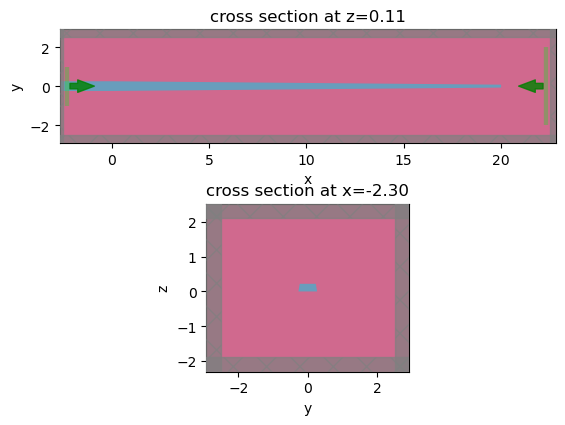

In [ ]:
sp = gt.write_sparameters(c, plot_simulation_layer_name="core", layer_stack=LAYER_STACK)

03:20:44 CEST WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: 'simulation.structures[0]' is outside of the simulation  
              domain.                                                           

              WARNING: Use the remote mode solver with subpixel averaging for   
              better accuracy through 'tidy3d.plugins.mode.web.run(...)'.       

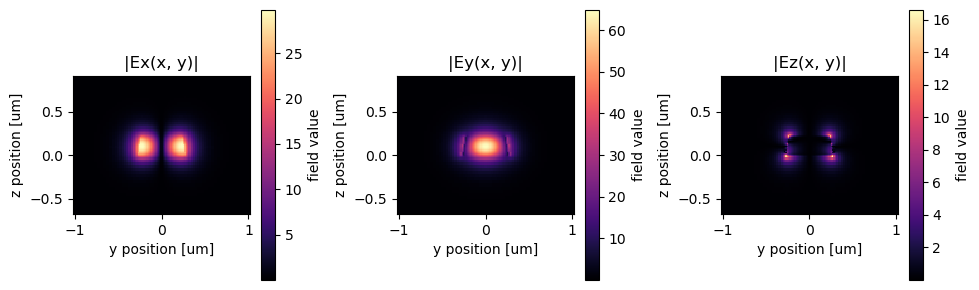

In [ ]:
# lets plot the fundamental input mode
sp = gt.write_sparameters(
    c, plot_mode_port_name="o1", plot_mode_index=0, layer_stack=LAYER_STACK
)

Skipping layer1=DerivedLayer(layer1=LogicalLayer(layer=<LAYER.WG: 1>), layer2=LogicalLayer(layer=<LAYER.DEEP_ETCH: 6>), operation='not') layer2=LogicalLayer(layer=<LAYER.SHALLOW_ETCH: 4>) operation='not'
Skipping layer1=LogicalLayer(layer=<LAYER.SHALLOW_ETCH: 4>) layer2=LogicalLayer(layer=<LAYER.WG: 1>) operation='and'
Adding layer=LogicalLayer(layer=<LAYER.SLAB150: 3>), layer_tuple=(2, 0) zmin=0.0, zmax=0.15 material_name='si'


03:21:46 CEST WARNING: The medium associated with structures[1] has a frequency 
              range: (1.692592e+14, 1.208995e+15) (Hz) that does not fully cover
              the frequencies contained in monitors[0]. This can cause          
              inaccuracies in the recorded results.                             

              WARNING: Suppressed 1 WARNING message.                            

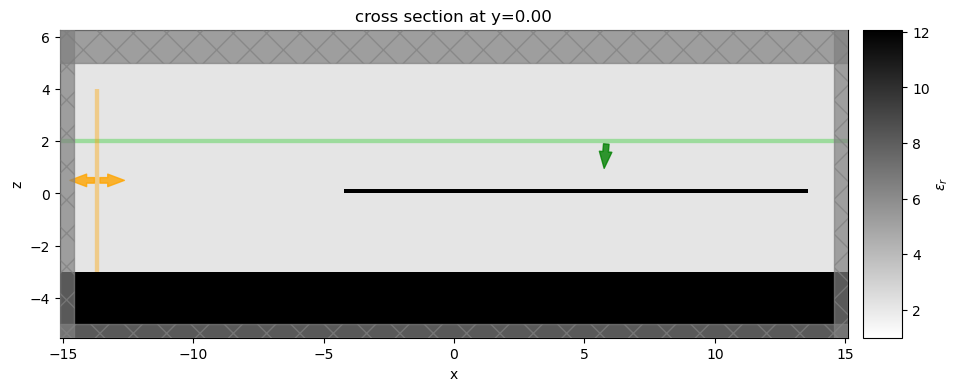

In [ ]:
c = (
    gf.components.grating_coupler_elliptical_lumerical()
)  # inverse design grating apodized
fiber_angle_deg = 5
s = gt.get_simulation_grating_coupler(
    c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=0
)
f = gt.plot_simulation(s)

In [ ]:
f = c.plot()

NameError: name 'c' is not defined

2024-08-26 03:37:49.087 | INFO     | kfactory.kcell:show:7894 - klive v0.3.3: Opened file '/tmp/3267791410.gds'
2024-08-26 03:37:49.088 | WARNING  | kfactory.kcell:show:7940 - KLayout GUI version is older than the python klayout.GUI:0.28.16 Python:0.29.6. This might cause missing,unfunctional, or erroneous features. Please update your GUI to a version equal or higher than the python version for optimal performance.


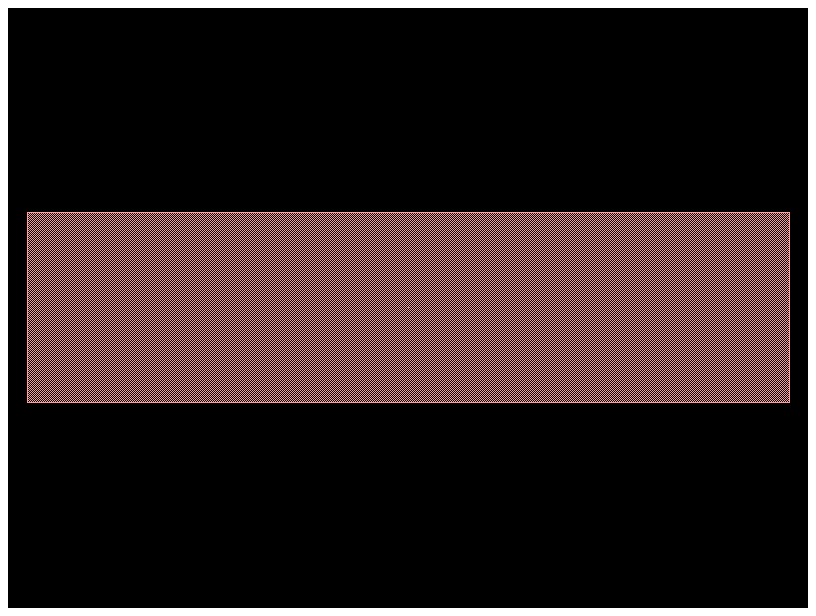

In [ ]:
import gdsfactory as gf
import matplotlib.pyplot as plt
import numpy as np
from autograd import tensor_jacobian_product
from gdsfactory.generic_tech import get_generic_pdk


import gplugins
import gplugins.gmeep as gm

gf.config.rich_output()
PDK = get_generic_pdk()
PDK.activate()

c = gf.components.straight(length=2)
c.plot()
c.write_gds('straight.gds')
c.show()





2024-08-26 03:39:47.438 | INFO     | kfactory.kcell:show:7894 - klive v0.3.3: Opened file '/tmp/1948190069.gds'
2024-08-26 03:39:47.439 | WARNING  | kfactory.kcell:show:7940 - KLayout GUI version is older than the python klayout.GUI:0.28.16 Python:0.29.6. This might cause missing,unfunctional, or erroneous features. Please update your GUI to a version equal or higher than the python version for optimal performance.


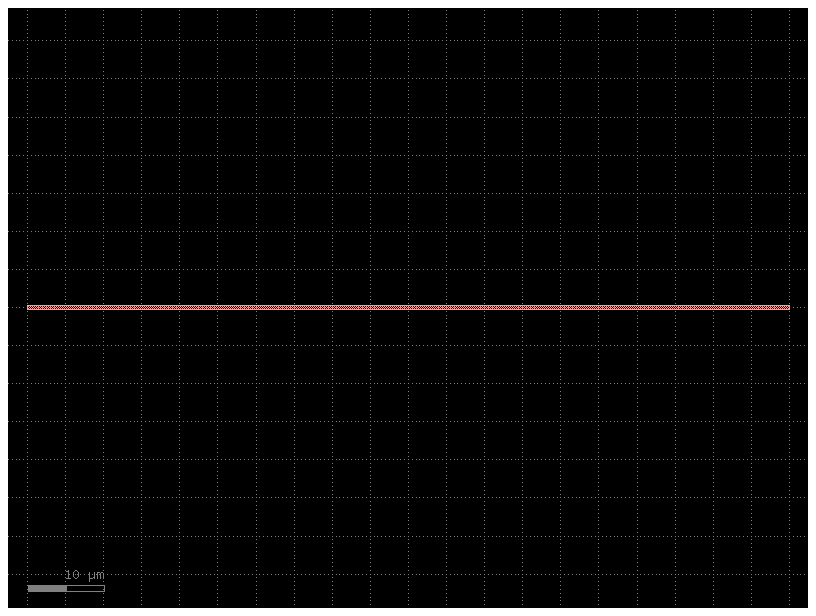

In [ ]:
import gdsfactory as gf

# Create a simple component
c = gf.components.straight(length=100)

# Save and plot
c.write_gds('test1.gds')
c.plot()

# Show in KLayout
c.show()


In [ ]:
import gdsfactory as gf
import matplotlib.pyplot as plt
import numpy as np
from autograd import tensor_jacobian_product
from gdsfactory.generic_tech import get_generic_pdk
from meep import MaterialGrid, Medium, Vector3, Volume
from meep.adjoint import (
    DesignRegion,
    get_conic_radius_from_eta_e,
)

import gplugins
import gplugins.gmeep as gm

gf.config.rich_output()
PDK = get_generic_pdk()
PDK.activate()

Using MPI version 4.1, 1 processes
2024-08-26 03:40:17.456 | INFO     | gplugins.gmeep:<module>:39 - Meep '1.29.0' installed at ['/home/hamed/anaconda3/lib/python3.11/site-packages/meep']


2024-08-26 03:40:50.905 | INFO     | kfactory.kcell:show:7894 - klive v0.3.3: Opened file '/tmp/get_simulation_get_simulation.gds'
2024-08-26 03:40:50.905 | WARNING  | kfactory.kcell:show:7940 - KLayout GUI version is older than the python klayout.GUI:0.28.16 Python:0.29.6. This might cause missing,unfunctional, or erroneous features. Please update your GUI to a version equal or higher than the python version for optimal performance.
2024-08-26 03:40:50.913 | ERROR    | kfactory.kcell:__getitem__:6025 - An error has been caught in function '__getitem__', process 'MainProcess' (5681), thread 'MainThread' (139200702780928):
Traceback (most recent call last):

  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/hamed/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
    │   └ <bound method Application.launch_instance of <class 'ipykernel.kernelapp.IPKernelApp'

/home/hamed/anaconda3/lib/python3.11/site-packages/meep/__init__.py:4443: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._get_epsilon_grid(gobj_list, mlist, _default_material, _ensure_periodicity, gv, cell_size, cell_center, nx, xtics, ny, ytics, nz, ztics, grid_vals, frequency)


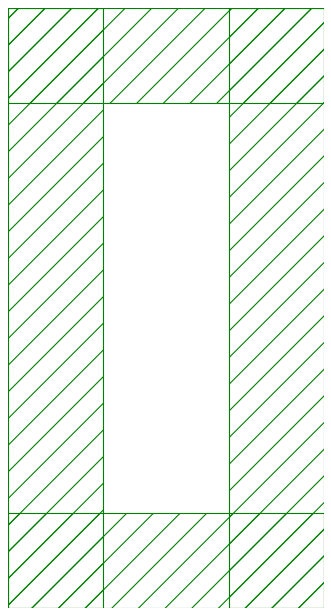

In [ ]:
c = gf.components.straight(length=2)
c.plot()
sp = gm.write_sparameters_meep(c, run=False, ymargin_top=3, ymargin_bot=3, is_3d=False)

2024-08-26 03:41:04.174 | INFO     | kfactory.kcell:show:7900 - klive v0.3.3: Reloaded file '/tmp/get_simulation_get_simulation.gds'
2024-08-26 03:41:04.174 | WARNING  | kfactory.kcell:show:7940 - KLayout GUI version is older than the python klayout.GUI:0.28.16 Python:0.29.6. This might cause missing,unfunctional, or erroneous features. Please update your GUI to a version equal or higher than the python version for optimal performance.
2024-08-26 03:41:04.180 | ERROR    | kfactory.kcell:__getitem__:6025 - An error has been caught in function '__getitem__', process 'MainProcess' (5681), thread 'MainThread' (139200702780928):
Traceback (most recent call last):

  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/hamed/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
    │   └ <bound method Application.launch_instance of <class 'ipykernel.kernelapp.IPKernelAp

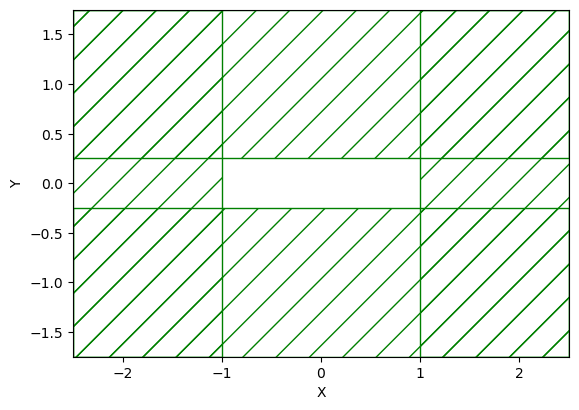

In [ ]:
c = gf.components.straight(length=2)
sp = gm.write_sparameters_meep(c, run=False, is_3d=False)

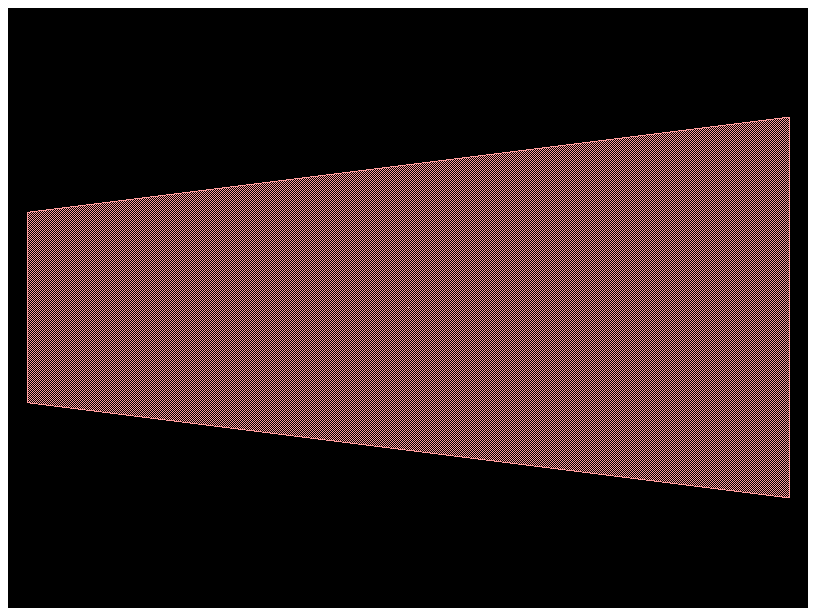

In [ ]:
c = gf.components.taper(length=2.0, width1=0.5, width2=1)
c.plot()

2024-08-26 03:41:30.795 | INFO     | kfactory.kcell:show:7900 - klive v0.3.3: Reloaded file '/tmp/get_simulation_get_simulation.gds'
2024-08-26 03:41:30.795 | WARNING  | kfactory.kcell:show:7940 - KLayout GUI version is older than the python klayout.GUI:0.28.16 Python:0.29.6. This might cause missing,unfunctional, or erroneous features. Please update your GUI to a version equal or higher than the python version for optimal performance.
2024-08-26 03:41:30.803 | ERROR    | kfactory.kcell:__getitem__:6025 - An error has been caught in function '__getitem__', process 'MainProcess' (5681), thread 'MainThread' (139200702780928):
Traceback (most recent call last):

  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/hamed/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
    │   └ <bound method Application.launch_instance of <class 'ipykernel.kernelapp.IPKernelAp

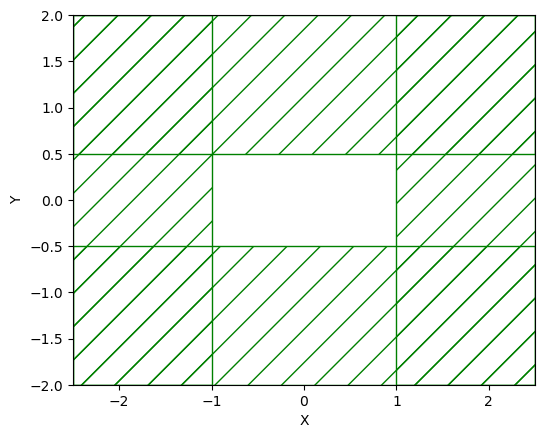

In [ ]:
sp = gm.write_sparameters_meep(c, run=False)

In [ ]:
core_material = gplugins.get_effective_indices(
    core_material=3.4777,
    clad_materialding=1.444,
    nsubstrate=1.444,
    thickness=0.22,
    wavelength=1.55,
    polarization="te",
)[0]

core_material

2.8494636999424405

In [ ]:
core_material = gplugins.get_effective_indices(
    core_material=3.4777,
    clad_materialding=1.444,
    nsubstrate=1.444,
    thickness=0.22,
    wavelength=1.55,
    polarization="te",
)[0]

core_material

NameError: name 'gplugins' is not defined